<a href="https://colab.research.google.com/github/darshan482/walmaert_sales/blob/main/walmart_sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

train = pd.read_csv("/content/train.csv")
test = pd.read_csv("/content/test.csv")
features = pd.read_csv("/content/features.csv")
stores = pd.read_csv("/content/stores.csv")

print(train.shape)
print(test.shape)
print(features.shape)
print(stores.shape)


(421570, 5)
(115064, 4)
(8190, 12)
(45, 3)


In [ ]:
# Convert Date columns to datetime format
train['Date'] = pd.to_datetime(train['Date'])
test['Date'] = pd.to_datetime(test['Date'])
features['Date'] = pd.to_datetime(features['Date'])

# Merge train with features and stores
train_merged = pd.merge(train, features, on=['Store', 'Date', 'IsHoliday'], how='left')
train_merged = pd.merge(train_merged, stores, on='Store', how='left')

# Merge test the same way
test_merged = pd.merge(test, features, on=['Store', 'Date', 'IsHoliday'], how='left')
test_merged = pd.merge(test_merged, stores, on='Store', how='left')

# Check merged data
print("Train merged shape:", train_merged.shape)
print("Test merged shape:", test_merged.shape)
train_merged.head()


Train merged shape: (421570, 16)
Test merged shape: (115064, 15)


,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
1,1,1,2010-02-12,46039.49,True,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,A,151315
2,1,1,2010-02-19,41595.55,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,A,151315
3,1,1,2010-02-26,19403.54,False,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,A,151315
4,1,1,2010-03-05,21827.90,False,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,A,151315


In [ ]:
# Extract date features
for df in [train_merged, test_merged]:
    df['Year'] = df['Date'].dt.year
    df['Month'] = df['Date'].dt.month
    df['Week'] = df['Date'].dt.isocalendar().week

# Optional: Convert Type to category or numeric
type_map = {'A': 1, 'B': 2, 'C': 3}
train_merged['Type'] = train_merged['Type'].map(type_map)
test_merged['Type'] = test_merged['Type'].map(type_map)

# Check result
train_merged[['Date', 'Year', 'Month', 'Week', 'Type']].head()


,Date,Year,Month,Week,Type
0,2010-02-05,2010,2,5,1
1,2010-02-12,2010,2,6,1
2,2010-02-19,2010,2,7,1
3,2010-02-26,2010,2,8,1
4,2010-03-05,2010,3,9,1


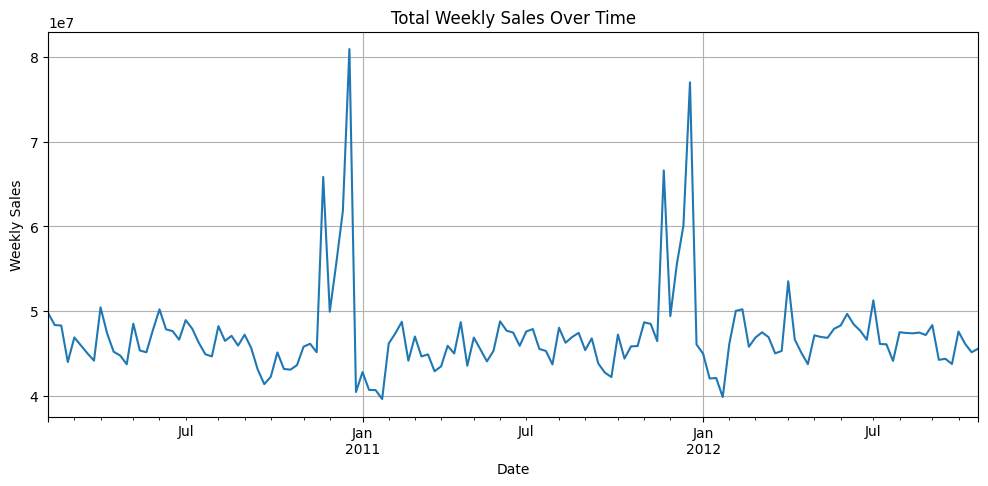

In [ ]:
import matplotlib.pyplot as plt

# Aggregate sales by date
sales_by_date = train_merged.groupby('Date')['Weekly_Sales'].sum()

# Plot
plt.figure(figsize=(12, 5))
sales_by_date.plot()
plt.title('Total Weekly Sales Over Time')
plt.ylabel('Weekly Sales')
plt.xlabel('Date')
plt.grid(True)
plt.show()


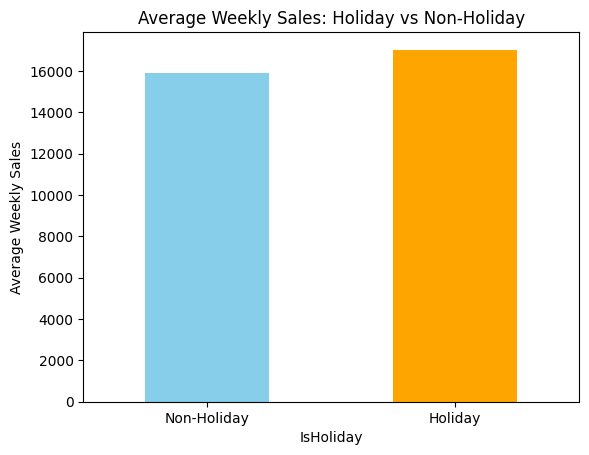

In [ ]:
holiday_sales = train_merged.groupby('IsHoliday')['Weekly_Sales'].mean()

# Bar plot
holiday_sales.plot(kind='bar', color=['skyblue', 'orange'])
plt.title('Average Weekly Sales: Holiday vs Non-Holiday')
plt.ylabel('Average Weekly Sales')
plt.xticks([0, 1], ['Non-Holiday', 'Holiday'], rotation=0)
plt.show()


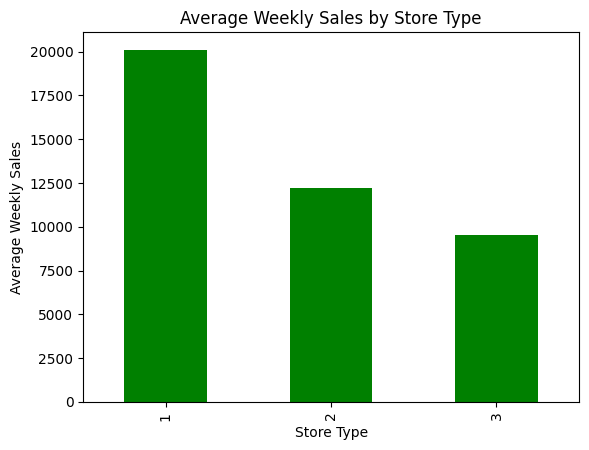

In [ ]:
type_sales = train_merged.groupby('Type')['Weekly_Sales'].mean()

type_sales.plot(kind='bar', color='green')
plt.title('Average Weekly Sales by Store Type')
plt.ylabel('Average Weekly Sales')
plt.xlabel('Store Type')
plt.show()


Text(0.5, 1.0, 'Fuel Price vs Weekly Sales')

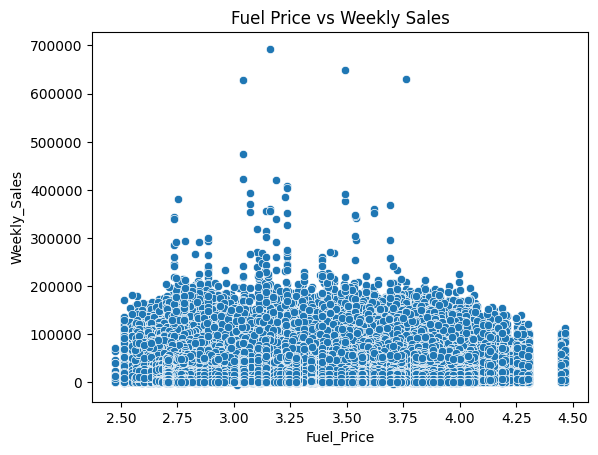

In [ ]:
import seaborn as sns

sns.scatterplot(x='Fuel_Price', y='Weekly_Sales', data=train_merged)
plt.title('Fuel Price vs Weekly Sales')


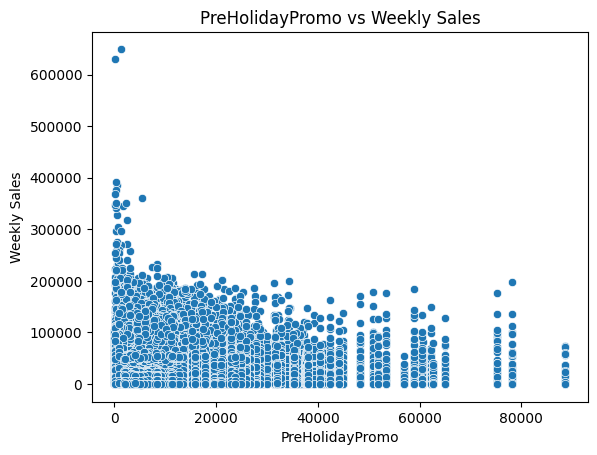

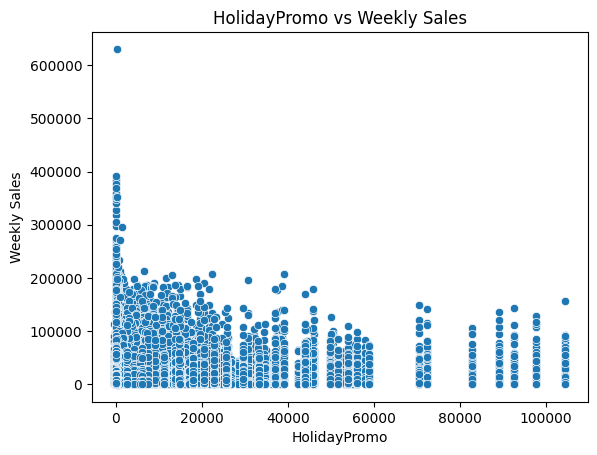

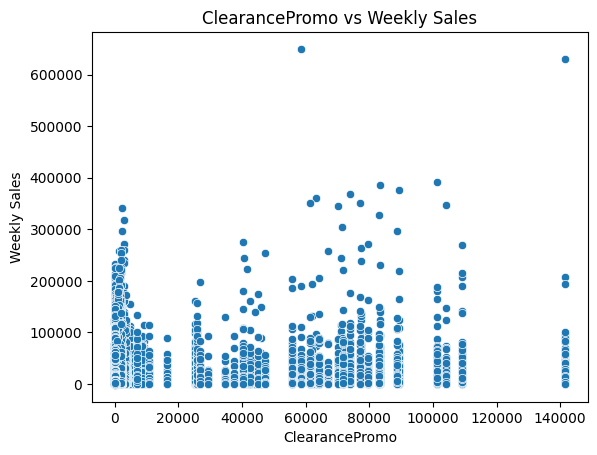

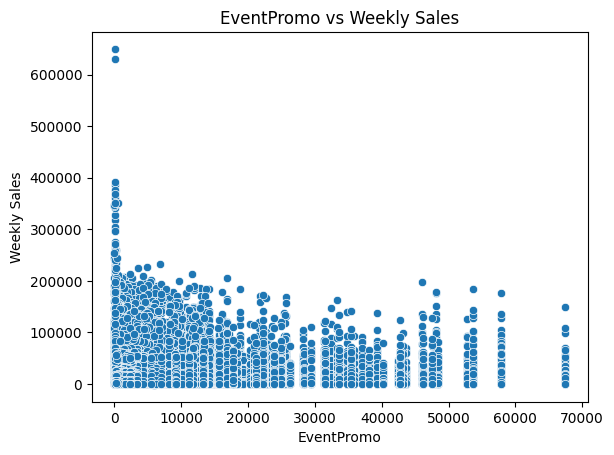

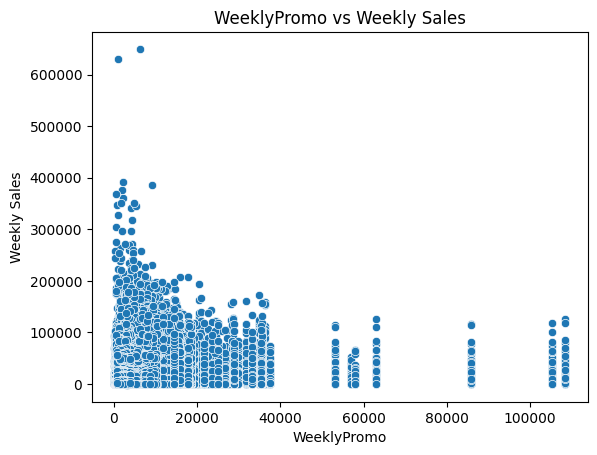

In [ ]:
# Use clearer, human-friendly names for each MarkDown column
markdown_cols = {
    'MarkDown1': 'PreHolidayPromo',
    'MarkDown2': 'HolidayPromo',
    'MarkDown3': 'ClearancePromo',
    'MarkDown4': 'EventPromo',
    'MarkDown5': 'WeeklyPromo'
}

# Plot each MarkDown type against Weekly Sales
for original_col, friendly_name in markdown_cols.items():
    sns.scatterplot(x=train_merged[original_col], y=train_merged['Weekly_Sales'])
    plt.title(f'{friendly_name} vs Weekly Sales')
    plt.xlabel(friendly_name)
    plt.ylabel('Weekly Sales')
    plt.show()


In [ ]:
train_merged['PrevWeekHoliday'] = train_merged['IsHoliday'].shift(1)
train_merged['NextWeekHoliday'] = train_merged['IsHoliday'].shift(-1)

print("Avg Sales Before Holiday:", train_merged[train_merged['PrevWeekHoliday'] == True]['Weekly_Sales'].mean())
print("Avg Sales On Holiday:", train_merged[train_merged['IsHoliday'] == True]['Weekly_Sales'].mean())
print("Avg Sales After Holiday:", train_merged[train_merged['NextWeekHoliday'] == True]['Weekly_Sales'].mean())


Avg Sales Before Holiday: 15696.955163345807
Avg Sales On Holiday: 17035.823187350394
Avg Sales After Holiday: 17937.495518020292


Text(0.5, 1.0, 'Correlation Heatmap')

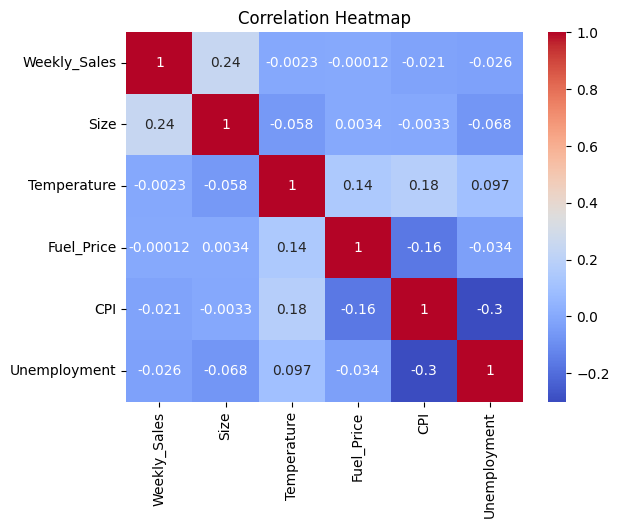

In [ ]:
import numpy as np

corr = train_merged[['Weekly_Sales', 'Size', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
